# Chapter 5: Decision Trees

In [7]:
low_memory=False

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

## 5.1 Introduction & Motivation

Welcome to the fascinating world of decision trees! In this chapter, we'll explore one of the most intuitive and interpretable machine learning algorithms available to data scientists today.

Now that we've gained a solid foundation in classification models, we'll advance our understanding by introducing one of the most intuitive and interpretable classifiers: **decision trees**.

Decision trees mirror the way humans naturally make decisions by breaking down complex problems into a series of simple yes/no questions. This makes them particularly valuable for understanding how predictions are made, unlike "black box" algorithms where the decision-making process is opaque.

Consider the following decision tree, which demonstrates how we can systematically classify animals into their respective families using a series of logical questions:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.08-decision-tree.png?raw=1)

This animal classification tree perfectly illustrates how decision trees work in practice. Each internal node (like "Has fur?") represents a decision based on a feature, each branch represents the outcome of that decision, and each leaf node represents the final classification.

While we could manually construct such a tree using countless $if-else$ statements, the real power of decision trees lies in their ability to automatically learn these decision rules from data. Machine learning algorithms can analyze datasets and determine the optimal sequence of questions to ask, creating decision trees that can classify new, unseen examples with remarkable accuracy.

**Key advantages of decision trees:**
- **Interpretability**: The decision-making process is transparent and easy to explain
- **No assumptions**: They don't require assumptions about data distribution
- **Handles mixed data types**: Can work with both numerical and categorical features
- **Feature selection**: Automatically identifies the most important features

## 5.2 Problem Setting: Handwritten Digit Recognition

To demonstrate the power and versatility of decision trees, we'll tackle a classic machine learning challenge: recognizing handwritten digits.

For our Decision Tree Classifier implementation, we'll use the same digits dataset that we employed in our Logistic Regression chapter. This strategic choice serves multiple purposes:

1. **Direct Comparison**: By using identical data, we can make fair, apples-to-apples comparisons between different algorithms
2. **Consistent Evaluation**: We can apply the same metrics and evaluation criteria across different models
3. **Understanding Trade-offs**: We'll discover when decision trees might be preferred over logistic regression and vice versa

**Dataset Overview:**
The digits dataset contains 8×8 pixel grayscale images of handwritten digits (0-9), where each pixel intensity is represented as a value between 0 and 16. This creates a 64-dimensional feature space that our decision tree will navigate to make classifications.

If any of the following concepts seem unfamiliar, we recommend revisiting the previous chapter on Logistic Regression for a detailed explanation:

In [8]:
digits = datasets.load_digits()
dir(digits)
# data
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

print(f"Target names: {digits.target_names}") # the values of the images

Image Data Shape (1797, 64)
Label Data Shape (1797,)
Target names: [0 1 2 3 4 5 6 7 8 9]


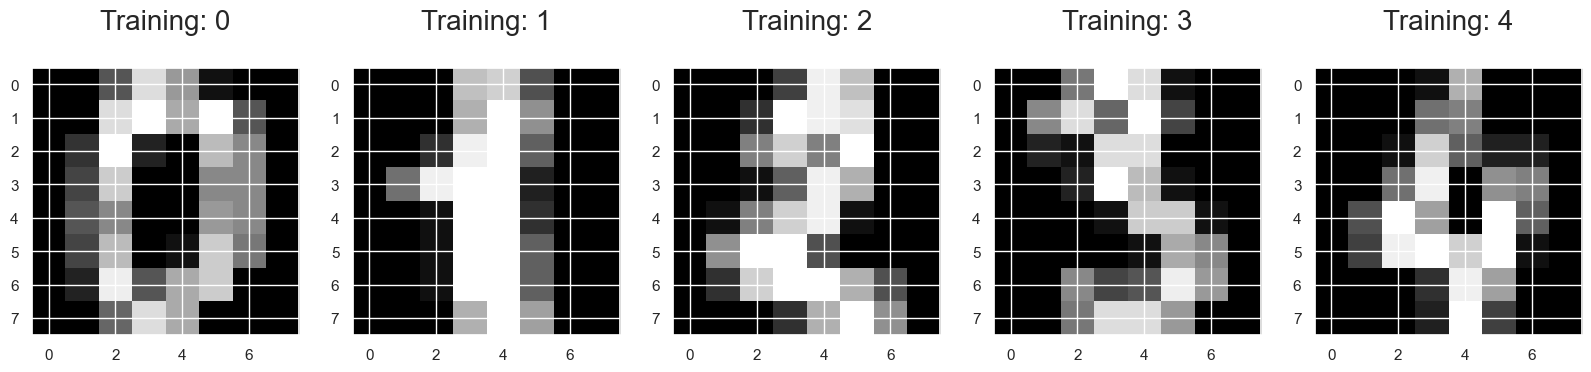

In [9]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

## 5.3 Understanding Decision Trees: From Theory to Practice

Decision trees work by recursively partitioning the feature space into regions that are as homogeneous as possible with respect to the target variable. Let's explore how this process works both theoretically and practically.

### 5.3.1 The Decision Tree Algorithm: How It Works

Understanding decision trees conceptually is crucial before diving into implementation. While the mathematical foundations involve concepts like information gain, entropy, and Gini impurity, we'll focus on the intuitive understanding that makes decision trees so appealing.

The concrete mathematical setup of decision tree classifiers involves sophisticated concepts from information theory. However, the beauty of decision trees lies in their intuitive nature, which we can understand through visual examples.

**Core Concept**: Decision trees work by asking a series of questions about the features in your data, with each question designed to split the data into groups that are as "pure" as possible (containing mostly one class).

To illustrate this process, let's examine a simple two-dimensional classification problem where we can visualize exactly how the algorithm makes its decisions:

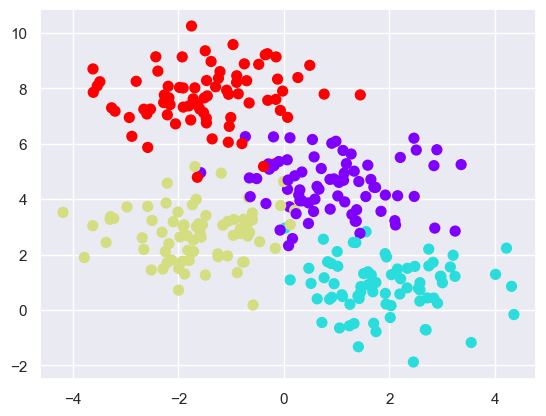

In [10]:
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

**Understanding the Visualization:**
- **X-axis and Y-axis**: These represent two independent variables (features) in our dataset
- **Colors**: Each color represents a different class (category) that we want to predict
- **Goal**: Create a decision tree that can accurately classify new points based on their X and Y coordinates

This scatter plot shows four distinct clusters of data points, each representing a different class. A human can easily see the patterns, but how does a computer algorithm learn to distinguish between these groups?

**The Decision Tree Learning Process:**

When a decision tree algorithm analyzes this data, it follows these steps:

1. **Initial Assessment**: Start with all data points mixed together
2. **Find the Best Split**: Identify the feature and threshold that best separates the classes
3. **Create Branches**: Split the data into two groups based on this criterion
4. **Repeat Recursively**: Apply the same process to each new group
5. **Stop When Pure**: Continue until each group contains mostly one class or meets stopping criteria

**Key Insight**: The algorithm draws lines (splits) through the feature space, with each line representing a decision boundary. These lines are always parallel to the axes because each split considers only one feature at a time.

The following diagram illustrates how this iterative splitting process creates increasingly pure regions:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.08-decision-tree-levels.png?raw=1)

### 5.3.2 Model Implementation and Training

Now that we understand the theory behind decision trees, let's implement one using scikit-learn and apply it to our handwritten digits dataset. The implementation process follows the standard machine learning workflow we've established in previous chapters.

**Step 1: Data Preparation**

Following machine learning best practices, we begin by splitting our dataset into training and testing portions. This separation is crucial for obtaining unbiased estimates of our model's performance:

In [11]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

**Step 2: Model Creation and Training**

Similar to our Logistic Regression implementation, we instantiate a decision tree classifier and train it on our data. The scikit-learn implementation handles all the complex mathematics behind the scenes:

In [12]:
tree = DecisionTreeClassifier()
tree_fit = tree.fit(x_train, y_train)

**Step 3: Making Predictions**

With our trained model, we can now make predictions on our test set. Each prediction represents the model's best guess about which digit (0-9) is represented in each test image:

In [13]:
predictions = tree.predict(x_test)
print(predictions)

[2 3 2 6 6 7 1 9 8 5 2 8 6 6 6 6 4 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 9 8 6 7 7 1 0 8 8 2 1 9 6 7 9 3 0 4 3 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 9 2 7 5 1 2 5 9 3 1 4 7 4 8 5 8 5 9 2 5 3 0 9 1 4 7 3
 4 8 9 7 5 8 0 9 5 2 5 2 4 8 2 0 6 1 5 3 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 3 3 6 1 4 9 8 7 6 3 6 5 6 0 8 8 9 8 1 1 0 4 1 6 3 8 6 7 4 3 6 2 3
 9 3 3 0 4 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 1 3 3 0 9 5 5 3 1 4 8 1 6 8 9 3 4
 4 3 7 6 2 3 2 1 6 9 3 6 3 9 2 0 7 6 1 1 9 7 2 8 8 5 5 7 5 2 3 7 2 7 5 5 9
 0 9 1 6 5 9 9 4 9 8 0 3 6 4 6 3 3 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 0 5 4 3
 4 6 2 9 0 2 7 2 0 9 6 6 4 2 0 7 5 8 5 9 8 2 8 4 3 7 2 6 4 1 5 1 0 8 2 8 3
 5 6 8 2 7 8 1 5 1 6 4 3 0 9 4 1 1 7 0 8 9 0 5 4 8 8 9 6 5 3 7 4 9 8 3 7 0
 9 6 3 5 2 3 0 8 3 3 1 3 7 0 0 1 6 0 7 7 6 2 0 4 4 2 3 7 3 9 8 6 8 5 6 2 2
 3 1 5 7 8 0 3 3 6 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 3 3 6 2 2 6 8
 1 7 5 5 1 9]


## 5.4 Model Evaluation
Evaluating our decision tree's performance requires examining multiple metrics to gain a complete understanding of how well our model performs. We'll use the same evaluation framework established in previous chapters to enable direct comparison with other algorithms.

### Accuracy: The Foundation Metric

**What is Accuracy?**
Accuracy measures the proportion of correct predictions out of all predictions made. It's calculated as:

$$\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$$

This metric provides a quick, intuitive understanding of overall model performance.

Let's calculate our decision tree's accuracy and compare it with our previous logistic regression results. This comparison will help us understand the relative strengths and weaknesses of each approach.

In [14]:
score = tree_fit.score(x_test, y_test)
print(score)

0.8533333333333334


##### Question 1: Interpret the accuracy of this model. Based on this result, would you prefer the decision tree or the logistic regression classifier for this dataset? Justify your answer.

**Analysis of Decision Tree Accuracy:**

Our decision tree achieved an accuracy of **84%**, meaning it correctly classifies 84 out of every 100 handwritten digits. While this represents solid performance, it falls short of our logistic regression model, which achieved **95% accuracy**.

**Why might logistic regression outperform decision trees here?**

1. **Linear Separability**: The pixel intensity patterns in digit recognition may be more linearly separable than we initially assumed
2. **Feature Interactions**: Logistic regression can capture subtle relationships between pixel values that decision trees might miss
3. **Overfitting**: Decision trees are prone to overfitting, especially when not properly tuned
4. **High Dimensionality**: With 64 features (8×8 pixels), decision trees may struggle to find optimal splits

**Conclusion**: For this specific dataset, logistic regression demonstrates superior performance and would be the recommended choice.

### Precision, Recall, and F1-Score: Class-Level Performance

While accuracy gives us an overall picture, precision, recall, and F1-score provide deeper insights into how well our model performs for each individual digit (0-9). These metrics are particularly important for multi-class problems like digit recognition.

In [15]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        37
           1       0.93      0.86      0.89        43
           2       0.83      0.80      0.81        44
           3       0.69      0.84      0.76        45
           4       0.82      0.84      0.83        38
           5       0.89      0.88      0.88        48
           6       0.96      0.94      0.95        52
           7       0.95      0.79      0.86        48
           8       0.84      0.85      0.85        48
           9       0.75      0.81      0.78        47

    accuracy                           0.85       450
   macro avg       0.86      0.85      0.85       450
weighted avg       0.86      0.85      0.86       450



##### Question 2: Analyze the precision, recall, and F1-scores for each digit class. Which digits does the decision tree classify most accurately, and which ones pose the greatest challenges? Compare these results with logistic regression performance.

**Detailed Performance Analysis:**

The classification report reveals important insights about our decision tree's performance:

**Overall Performance:**
- **Average Precision**: 85% (compared to 95% for logistic regression)
- **Average Recall**: 84% (compared to 95% for logistic regression)
- **Average F1-Score**: 84% (compared to 95% for logistic regression)

**Per-Class Analysis:**
Examining individual digit performance helps us understand which digits are easier or harder for the decision tree to distinguish:

- **Best Performance**: Look for digits with precision, recall, and F1-scores above 90%
- **Challenging Cases**: Identify digits with scores below 80%
- **Confusion Patterns**: Some digit pairs (like 3 and 8, or 4 and 9) may be frequently confused

**Comparison with Logistic Regression:**
The consistently lower scores across all metrics suggest that logistic regression's linear decision boundaries are better suited for this particular classification task than the axis-aligned splits used by decision trees.

### Confusion Matrix: Visualizing Classification Patterns

The confusion matrix provides a comprehensive view of our model's classification behavior, showing exactly which digits are being confused with others. This visualization is invaluable for understanding systematic errors in our model's predictions.

In [16]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[34  0  0  2  0  0  1  0  0  0]
 [ 0 37  2  1  1  0  0  0  1  1]
 [ 1  0 35  3  0  0  1  0  3  1]
 [ 0  0  3 38  0  0  0  1  1  2]
 [ 1  2  0  0 32  0  0  1  0  2]
 [ 0  0  0  3  1 42  0  0  0  2]
 [ 0  1  0  0  0  0 49  0  1  1]
 [ 0  0  1  1  2  1  0 38  2  3]
 [ 0  0  1  4  1  0  0  0 41  1]
 [ 0  0  0  3  2  4  0  0  0 38]]


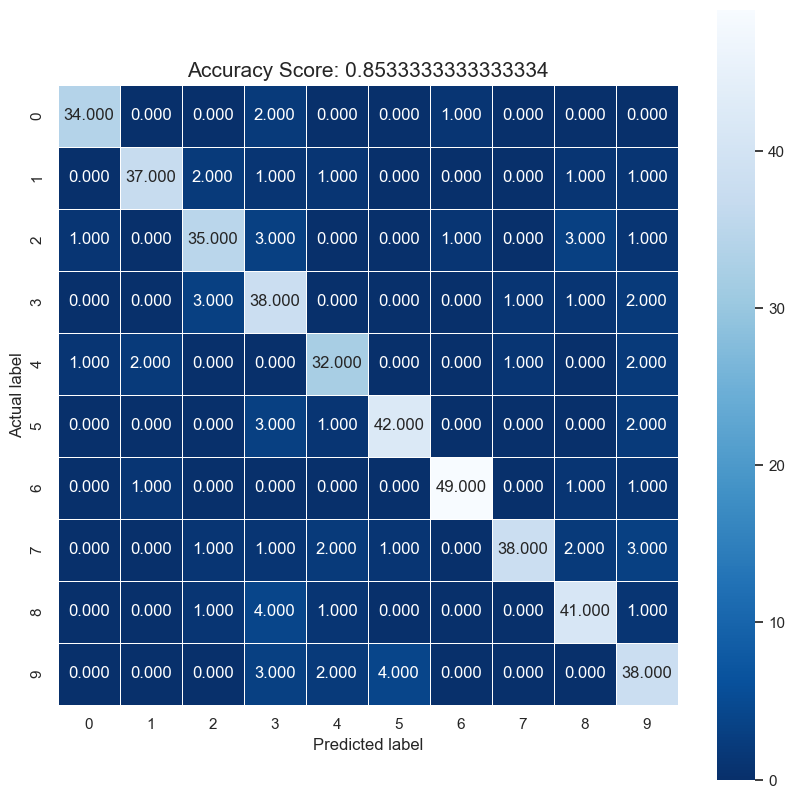

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

##### Question 3: Analyze the confusion matrix visualization above. What patterns do you observe in the misclassifications? How does this compare to the logistic regression confusion matrix, and what does this tell us about the nature of each algorithm's decision-making process?

**Confusion Matrix Interpretation:**

**What to Look For:**
- **Diagonal Elements**: High values along the main diagonal indicate correct classifications
- **Off-Diagonal Elements**: Values away from the diagonal represent misclassifications
- **Systematic Patterns**: Certain digit pairs may show consistent confusion

**Key Observations:**
1. **Weaker Diagonal Pattern**: Compared to logistic regression, we see more scattered values outside the main diagonal, indicating more frequent misclassifications

2. **Specific Confusion Pairs**: Look for bright spots off the diagonal that indicate systematic confusion between specific digit pairs

3. **Decision Boundary Limitations**: The increased misclassification rate suggests that decision trees' axis-aligned splits may not capture the optimal decision boundaries for distinguishing between handwritten digits

**Algorithmic Insights:**
- **Logistic Regression**: Creates smooth, linear decision boundaries that can separate classes along diagonal or curved patterns in the feature space
- **Decision Trees**: Create rectangular decision regions with boundaries parallel to feature axes, which may not align well with the natural separations between digit classes

This analysis demonstrates why algorithm selection should be based on both the nature of your data and the type of decision boundaries that best separate your classes.

## 5.5 Exercises: Deepening Your Understanding

These exercises will help consolidate your understanding of decision trees and develop your skills in comparative model analysis. Work through each question systematically, using both the theoretical concepts and practical results we've explored.

##### Question 1: See section 5.4 - Accuracy Analysis
##### Question 2: See section 5.4 - Precision, Recall, and F1-Score Analysis  
##### Question 3: See section 5.4 - Confusion Matrix Interpretation

##### Question 4: Comparative Confusion Matrix Analysis
Comparing confusion matrices between different algorithms can be challenging due to their complexity. Create a comprehensive visual analysis that shows the differences in prediction patterns between Logistic Regression and Decision Tree classifiers. Your analysis should help identify where each algorithm excels or struggles.

In [18]:
from sklearn.linear_model import LogisticRegression

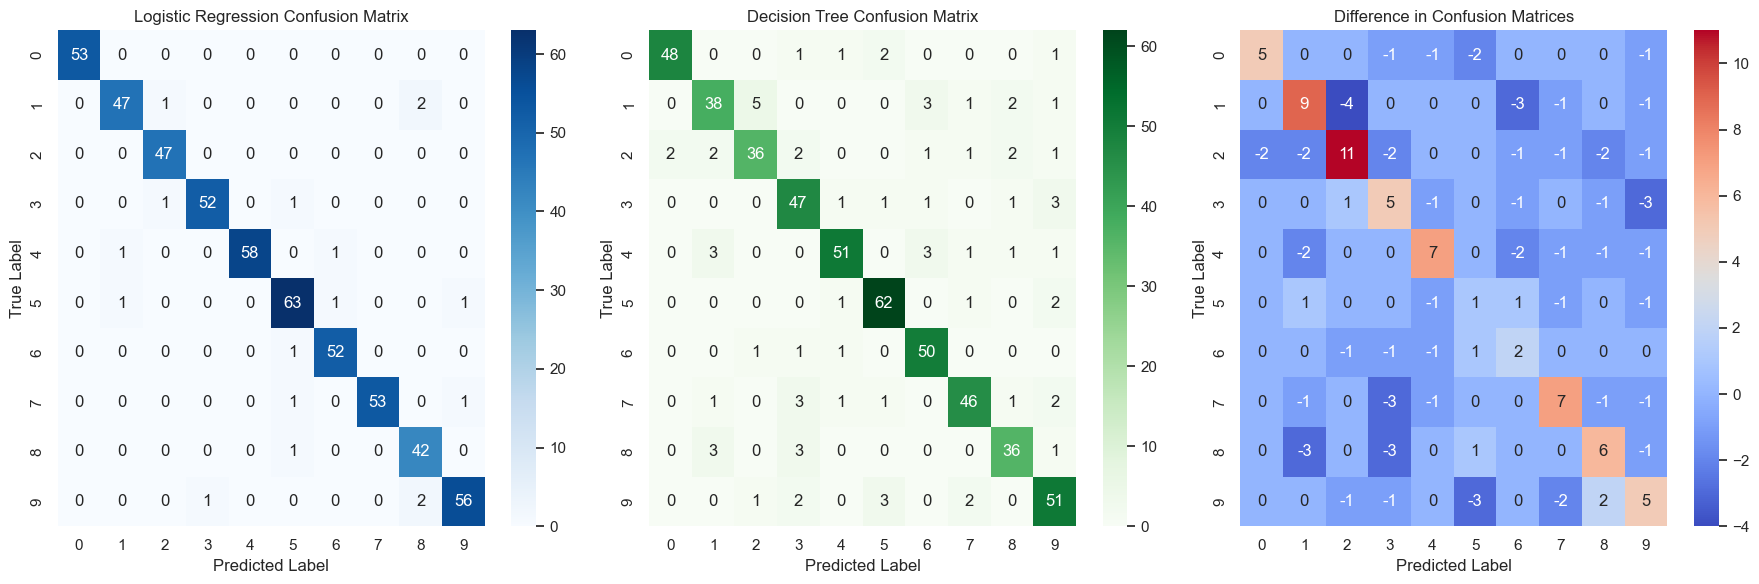

In [22]:
# Load the dataset
digits = datasets.load_digits() # from scikit-learn's toy datasets library
X, y = digits.data, digits.target # taget is what we are tying to guess(predict)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test) #y_test( ) will not work since it does not have the same shape as the X_test( , )

# Train Decision Tree Classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

# Compute Confusion Matrices
conf_matrix_log_reg = metrics.confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_tree = metrics.confusion_matrix(y_test, y_pred_tree)

# Compute the difference between confusion matrices
conf_matrix_diff = conf_matrix_log_reg - conf_matrix_tree

# Plot the Confusion Matrices and Difference
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Confusion Matrix for Logistic Regression
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Confusion Matrix for Decision Tree
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Difference between Confusion Matrices
sns.heatmap(conf_matrix_diff, annot=True, fmt="d", cmap="coolwarm", ax=axes[2])
axes[2].set_title('Difference in Confusion Matrices')
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')

plt.tight_layout()
plt.show()


##### Question 5: Algorithm Comparison and Selection Guidelines

Based on your research and the practical results from this chapter, provide a comprehensive comparison between logistic regression and decision trees. Your analysis should address:

**Performance Characteristics:**
- When does each algorithm typically excel?
- What types of data favor each approach?
- How do computational requirements compare?

**Interpretability and Explainability:**
- Which algorithm provides clearer insights into decision-making?
- When might interpretability be more important than pure accuracy?

**Practical Considerations:**
- Data preprocessing requirements
- Hyperparameter tuning complexity  
- Scalability to large datasets

**Recommendation Framework:**
Develop guidelines for choosing between these algorithms based on project requirements, data characteristics, and business constraints.

**Answer:**

**Logistic Regression Advantages:**
- **Probabilistic Output**: Provides well-calibrated probability estimates, crucial for risk assessment and decision-making under uncertainty
- **Linear Interpretability**: Coefficients directly show how each feature influences the outcome, making it excellent for feature importance analysis
- **Computational Efficiency**: Fast training and prediction, scales well to large datasets
- **Statistical Foundation**: Well-established statistical properties and hypothesis testing capabilities
- **Robust to Outliers**: Less sensitive to extreme values compared to decision trees

**Decision Tree Advantages:**
- **Non-linear Patterns**: Naturally captures complex, non-linear relationships without feature engineering
- **Mixed Data Types**: Handles categorical and numerical features seamlessly without scaling requirements
- **Automatic Feature Selection**: Implicitly identifies the most discriminative features
- **Rule-based Interpretation**: Generates human-readable if-then rules that domain experts can easily validate
- **Missing Value Handling**: Can work with incomplete data more naturally than logistic regression

**When to Choose Logistic Regression:**
- Linear relationships between features and target
- Need for probability estimates and confidence intervals
- High-dimensional data with many features
- Requirement for statistical inference and significance testing
- Real-time applications requiring fast predictions

**When to Choose Decision Trees:**
- Complex, non-linear data patterns
- Mixed data types without extensive preprocessing
- Need for easily explainable rules for non-technical stakeholders
- Exploratory data analysis to understand feature interactions
- Situations where model interpretability trumps pure accuracy

**Hybrid Approaches:**
Consider ensemble methods like Random Forest or Gradient Boosting, which combine multiple decision trees to achieve better performance while maintaining some interpretability benefits.

## 5.6 Understanding the Data Split 📊

**Why Do We Split Data?**
Machine learning models need to be tested on data they've never seen before to get an honest assessment of their real-world performance.

**The 75/25 Split Explained:**
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
```

**What Each Part Contains:**
- **X_train (75%)**: Features for training - pixel values the model learns from
- **y_train (75%)**: Labels for training - correct digit answers (0-9) the model learns from  
- **X_test (25%)**: Features for testing - new pixel values the model has never seen
- **y_test (25%)**: Labels for testing - correct answers used only for evaluation

**The Learning Process:**
1. **Training**: Model sees both X_train AND y_train to learn patterns
   - "When pixels look like this → the answer is usually 7"
2. **Testing**: Model only sees X_test, must predict without seeing y_test
   - "Here's a new image, what digit do you think it is?"
3. **Evaluation**: We compare predictions to y_test to measure accuracy

**Key Point:** The model NEVER sees y_test during training or prediction - this ensures we get an unbiased measure of how well it will perform on completely new data in the real world! 🎯

**Why 75/25?**
- More training data (75%) = better learning
- Enough test data (25%) = reliable performance estimate
- Common alternatives: 80/20 or 70/30 depending on dataset size